In [20]:
import numpy as np
import polars as pl
import polars.selectors as cs
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pl.read_csv("../../DATA/mouse_viral_study.csv")

In [22]:
df

Med_1_mL,Med_2_mL,Virus Present
f64,f64,i64
6.508231,8.582531,0
4.126116,3.073459,1
6.42787,6.369758,0
3.672953,4.905215,1
1.580321,2.440562,1
…,…,…
2.884122,3.271748,1
7.290855,9.488672,0
7.895325,8.272529,0


In [23]:
df.columns

['Med_1_mL', 'Med_2_mL', 'Virus Present']

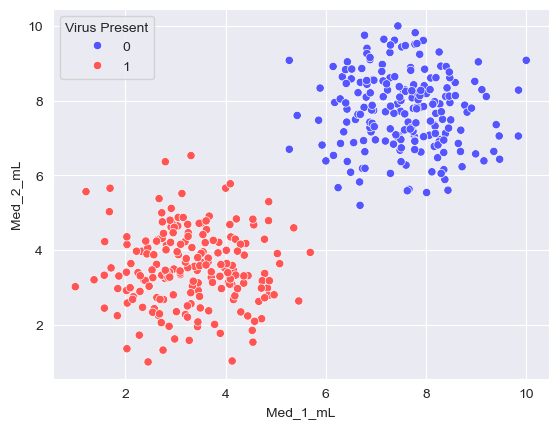

In [24]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='seismic')
plt.show()

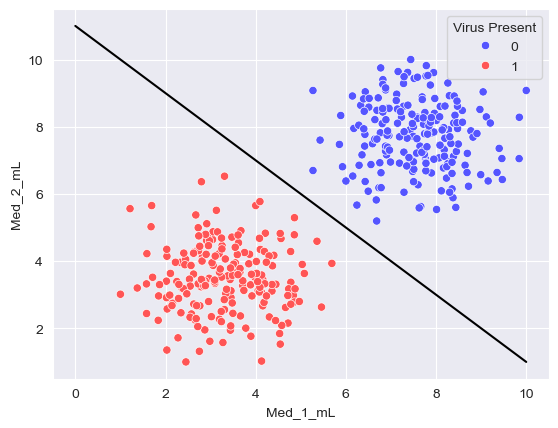

In [25]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b
plt.plot(x, y, 'k')

In [26]:
from sklearn.svm import SVC

In [27]:
X = df.select(cs.exclude(['Virus Present']))

In [28]:
y = df['Virus Present']

In [29]:
svc_model = SVC(kernel='linear', C=1000)

In [30]:
svc_model.fit(X,y)

SVC(C=1000, kernel='linear')

In [31]:
from svm_margin_plot import plot_svm_boundary

In [36]:
X = X.to_pandas()
y = y.to_pandas()

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


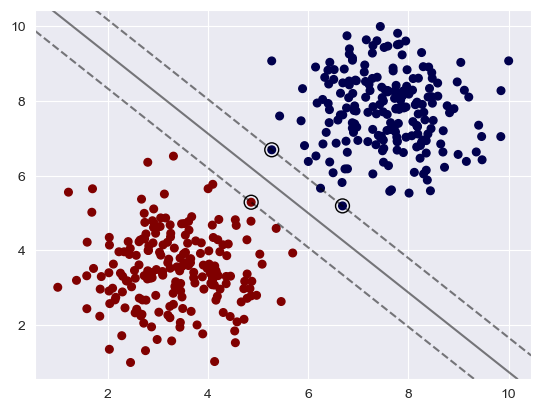

In [37]:
plot_svm_boundary(svc_model,X, y)

In [38]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


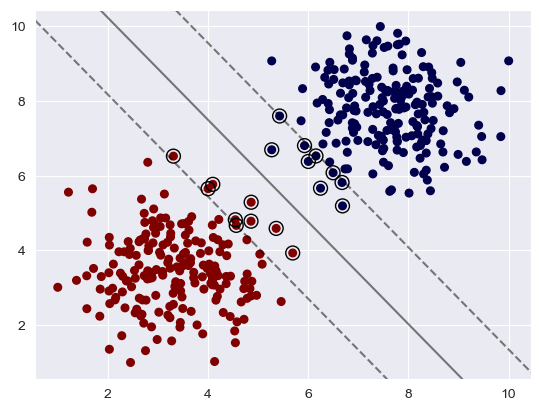

In [40]:
plot_svm_boundary(model, X, y)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


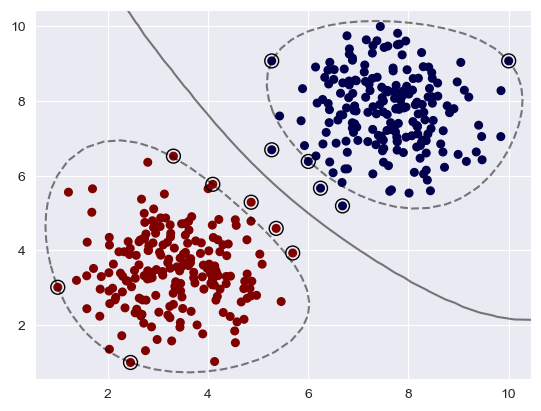

In [41]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


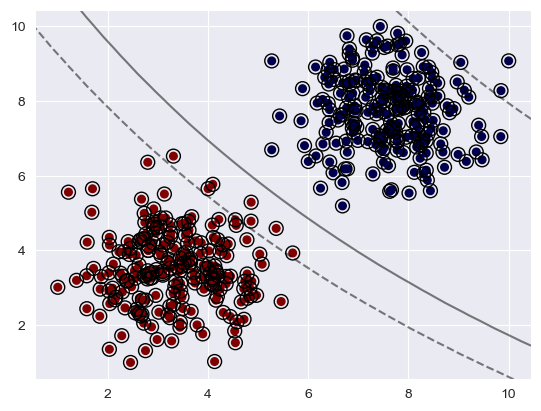

In [42]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


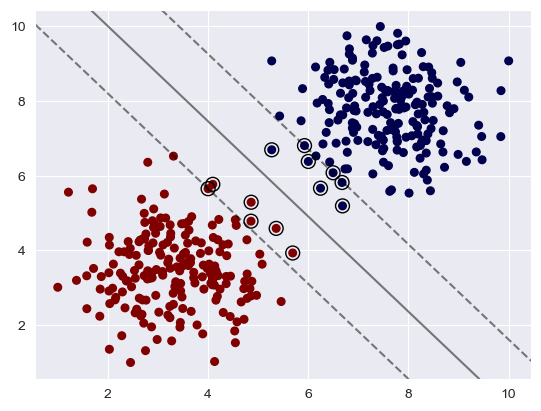

In [43]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


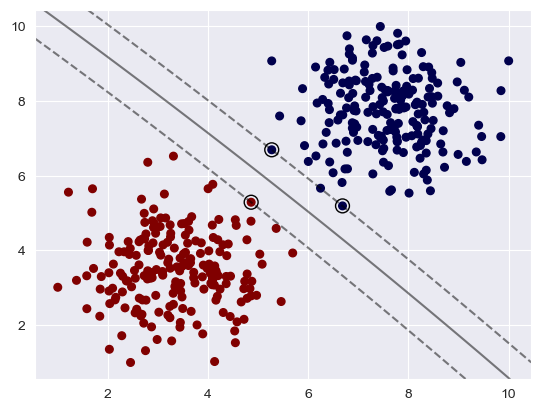

In [44]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


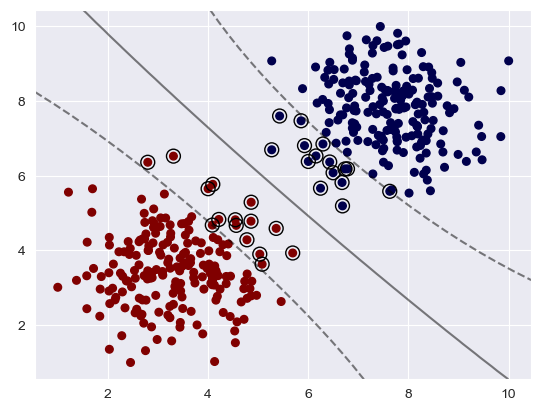

In [45]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [48]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [49]:
grid.best_score_

1.0

In [50]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}